In [5]:
from queue import Queue
import chess, random, _thread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

def outcome(board):
    if board.is_checkmate():
        if board.turn:
            return "Black"
        else:
            return "White"
    else:
        return "Draw"

#calc total moves
def moves(board):
    return board.fullmove_number * 2 - 1 if board.turn else board.fullmove_number * 2 - 2

def play(i):
    board = chess.Board()
    while not board.is_game_over():
        board.push(random.choice(list(board.legal_moves)))
    return i, outcome(board), moves(board)

def thread_wrapper(i, func, stat, q):
    def run():
        q.put(func)
        stat[i] = True
    return run

workers = 500000
status = [False for i in range(workers)]
q = Queue()
for i in range(workers):
    _thread.start_new_thread(thread_wrapper(i, play(i), status, q), tuple())

while not all(status):
    pass

results = []
while not q.empty():
    results.append(q.get())
results_df = pd.DataFrame(results, columns=['game_n', 'outcome', 'moves'])
#TODO process the results

results_df.to_csv('my_file.csv')

black = results_df.loc[results_df['outcome'] == 'Black']
white = results_df.loc[results_df['outcome'] == 'White']
draw = results_df.loc[results_df['outcome'] == 'Draw']
win = results_df.loc[results_df['outcome'] != 'Draw']

Total = len(results_df.index)
Wins = len(win.index)

PercentBlack = "Black Wins ≈ %s" % ('{0:.2%}'.format(len(black.index)/Total))
PercentWhite = "White Wins ≈ %s" % ('{0:.2%}'.format(len(white.index)/Total))
PercentDraw = "Draw ≈ %s" % ('{0:.2%}'.format(len(draw.index)/Total))
AllTitle = 'Distribution of Moves by All Outcomes (nSample = %s)' % workers

a = draw.moves
b = black.moves
c = white.moves

kdea = scipy.stats.gaussian_kde(a)
kdeb = scipy.stats.gaussian_kde(b)
kdec = scipy.stats.gaussian_kde(c)

grid = np.arange(700)

#weighted kde curves
wa = kdea(grid)*(len(a)/float(len(a)+len(b)+len(c)))
wb = kdeb(grid)*(len(b)/float(len(a)+len(b)+len(c)))
wc = kdec(grid)*(len(c)/float(len(a)+len(b)+len(c)))

total = wa+wb+wc
wtotal = wb+wc

plt.figure(figsize=(10,5))
plt.plot(grid, total, lw=2, label="Total")
plt.plot(grid, wa, lw=1, label=PercentDraw)
plt.plot(grid, wb, lw=1, label=PercentBlack)
plt.plot(grid, wc, lw=1, label=PercentWhite)
plt.title(AllTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()

ExpectedBlack = "EV Black Wins ≈ %s" % ('{0:.2%}'.format(len(black.index)/Wins))
ExpectedWhite = "EV White Wins ≈ %s" % ('{0:.2%}'.format(len(white.index)/Wins))
WinTitle = 'Distribution of Moves by Wins (nWins = %s)' % Wins

plt.figure(figsize=(10,5))
plt.plot(grid, wtotal, lw=2, label="Wins")
plt.plot(grid, wb, lw=1, label=ExpectedBlack)
plt.plot(grid, wc, lw=1, label=ExpectedWhite)
plt.title(WinTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()

print("Most frequent moves of All:", grid[total.argmax()], round(max(total), 4), "for", Total, "games")
print("Most frequent moves of Draws:", grid[wa.argmax()], round(max(wa), 4), "for", len(draw.index), "games")
print("Most frequent moves of Wins:", grid[wtotal.argmax()], round(max(wtotal), 4), "for", Wins, "games")
print("Most frequent moves of Black wins:", grid[wb.argmax()], round(max(wb), 4), "for", len(black.index), "games")
print("Most frequent moves of White wins:", grid[wc.argmax()], round(max(wc), 4), "for", len(white.index), "games")

KeyboardInterrupt: 

In [3]:
import chess, random, _thread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
white_data = np.zeros((64, 6), dtype=int) # A1 = 0, B1 = 1, ..., G8 = 62, H8 = 63
black_data = np.zeros((64, 6), dtype=int)

# store total number of visits, by piece, in each cell
def num_visits(to_square, piece, color):
    if color:
        white_data[to_square][piece.piece_type-1] += 1
    else:
        black_data[to_square][piece.piece_type-1] += 1

for i in range(10000):
    board = chess.Board()
    j = 0
    while not board.is_game_over():
        move = random.choice(list(board.legal_moves))
        j += 1
        num_visits(move.to_square, board.piece_at(move.from_square), board.color_at(move.from_square))
        #write_move(move.to_square, j, board.piece_at(move.from_square), board.piece_at(move.to_square))
        # insert here operations completed after each move
        #print(move.to_square, board.piece_at(move.from_square), board.piece_at(move.to_square))
        board.push(move)

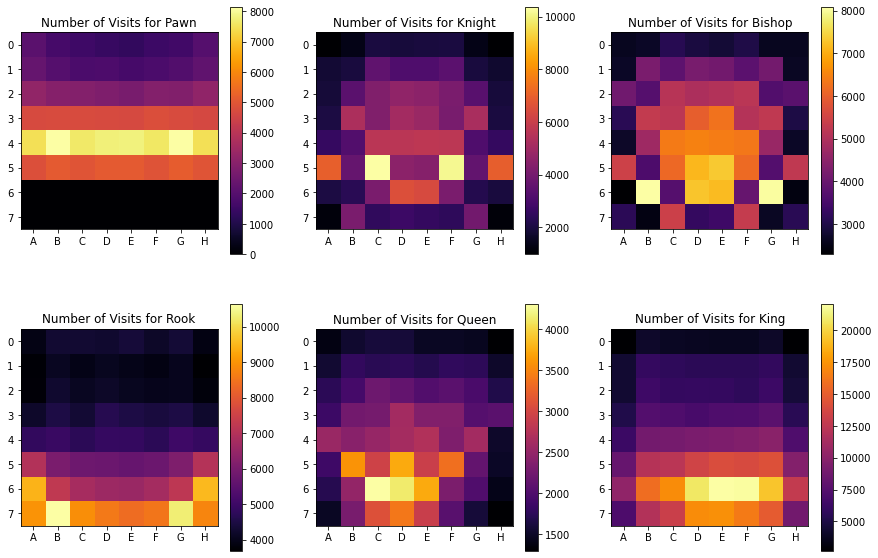

In [78]:
visits_board = np.reshape(black_data, (8, 8, 6))
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(visits_board[:,:,i], "inferno")
    plt.title("Number of Visits for " + piece_map[i+1].capitalize())
    plt.xticks(np.arange(8), ("A", "B", "C", "D", "E", "F", "G", "H"))
    plt.colorbar()
plt.savefig('heatmap.png', dpi=400, transparent=True)

In [30]:
data = np.zeros((64, 6), dtype=int)
print(data[0])

[0 0 0 0 0 0]


In [55]:
piece_map = {1: "pawn", 2: "knight", 3: "bishop", 4: "rook", 5: "queen", 6: "king"}

In [56]:
print(piece_map[1])

pawn


In [68]:
visits_board

array([[[ 2099,   984,  2626,  3939,  1401,  2700],
        [ 1741,  1372,  2684,  4306,  1547,  4192],
        [ 1567,  2018,  3121,  4289,  1611,  3937],
        [ 1457,  1941,  2935,  4284,  1602,  3839],
        [ 1354,  2004,  2851,  4386,  1493,  3772],
        [ 1535,  2009,  3002,  4198,  1497,  3801],
        [ 1643,  1368,  2618,  4357,  1474,  4136],
        [ 2002,  1013,  2616,  3932,  1309,  2722]],

       [[ 2327,  1838,  2687,  3748,  1560,  4374],
        [ 2029,  1973,  4249,  4106,  1796,  6004],
        [ 1820,  3571,  3851,  3986,  1735,  5773],
        [ 1851,  3157,  4221,  4073,  1758,  5583],
        [ 1722,  3179,  4125,  3993,  1710,  5601],
        [ 1817,  3465,  3809,  3916,  1789,  5596],
        [ 1937,  1986,  4149,  4056,  1760,  5955],
        [ 2232,  1787,  2668,  3688,  1524,  4367]],

       [[ 3237,  1920,  4111,  3782,  1754,  4416],
        [ 2955,  3420,  3728,  4267,  1932,  6471],
        [ 2927,  4314,  5122,  4107,  2222,  6004],
        